In [38]:
# Data Source: https://www.kaggle.com/datasets/riinuanslan/sleep-data-from-fitbit-tracker/data

In [3]:
import hashlib

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns

pd.set_option('display.max_columns', None)

In [4]:
def plot_feature_threshold(data, col):
    thresholds = data[col].quantile([0.25, 0.5, 0.75]).values

    print(thresholds)

    plt.hist(data[col], bins=30, alpha=0.5, color='g', edgecolor='black')

    for threshold in thresholds:
        plt.axvline(x=threshold, color='r', linestyle='--')

    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram with Thresholds')
    plt.show()


def md5_hash(text):
    """Function to compute MD5 hash for a given text"""
    return hashlib.md5(text.encode()).hexdigest()


def md5_row(row):
    """ Function to compute MD5 hash for an entire row """
    combined = ''.join(str(value) for value in row)
    return md5_hash(combined)

In [5]:
df_Jan = pd.read_csv('../data/raw/January sleep data - Sheet1.csv')
df_Feb = pd.read_csv('../data/raw/February sleep data - Sheet1 (1).csv')
df_Mar = pd.read_csv('../data/raw/March sleep data - Sheet1.csv')
df_Abr = pd.read_csv('../data/raw/April sleep data - Sheet1.csv')
df_Nov = pd.read_csv('../data/raw/November Sleep Data - Sheet1.csv')
df_Dec = pd.read_csv('../data/raw/December Sleep data - Sheet1.csv')

In [6]:
df_Mar.head()

,MARCH,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEARTRATE BELOW RESTING,SLEEP TIME
0,Tuesday,03/01/2022,81.0,6:47:00,19.00%,15.00%,91.00%,11:32pm - 7:42am
1,Wednesday,03/02/2022,86.0,7:36:00,14.00%,17.00%,97.00%,11:02pm - 7:41am
2,Thursday,03/03/2022,83.0,7:59:00,20.00%,13.00%,44.00%,11:07pm - 8:01am
3,Friday,03/04/2022,84.0,8:29:00,18.00%,13.00%,99.00%,10:42pm - 8:44am
4,Saturday,03/05/2022,87.0,8:30:00,20.00%,19.00%,72.00%,11:33pm - 9:10am


# Feature Engineering

In [7]:
df_Jan = df_Jan.rename(columns={'JANUARY': 'Day'})

df_Feb = df_Feb.rename(columns={'FEBEUARY': 'Day'})
df_Feb = df_Feb.rename(columns={'SLEEP SQORE': 'SLEEP SCORE'})

df_Mar = df_Mar.rename(columns={'MARCH': 'Day'})
df_Mar = df_Mar.rename(columns={'HEARTRATE BELOW RESTING': 'HEART RATE BELOW RESTING'})

df_Abr = df_Mar.rename(columns={'APRIL': 'Day'})
df_Abr = df_Mar.rename(columns={'HEART RATE UNDER RESTING': 'HEART RATE BELOW RESTING'})

df_Nov = df_Nov.rename(columns={'NOVEMBER': 'Day'})
df_Dec = df_Dec.rename(columns={'DECEMBER': 'Day'})

df_Jan = df_Jan.rename(columns={'HEART RATE UNDER RESTING': 'HEART RATE BELOW RESTING'})


df = pd.concat([df_Nov, df_Dec, df_Jan, df_Feb, df_Mar, df_Abr])

df = df.reset_index(drop=True)

df = df.dropna()
df = df.sort_values(by="DATE")

In [8]:
df.head()

,Day,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
64,Saturday,01/01/2022,63.0,4:13:00,15.00%,18.00%,0.00%,06:10am - 10:52am
65,Sunday,01/02/2022,90.0,8:09:00,22.00%,18.00%,92.00%,02:51am - 11:59am
66,Monday,01/03/2022,83.0,7:27:00,16.00%,13.00%,96.00%,11:27pm - 08:28am
67,Tuesday,01/04/2022,90.0,7:25:00,19.00%,21.00%,99.00%,10:52pm - 07:19am
68,Wednesday,01/05/2022,81.0,7:10:00,18.00%,15.00%,89.00%,10:42pm - 06:57am


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 64 to 62
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Day                       178 non-null    object 
 1   DATE                      178 non-null    object 
 2   SLEEP SCORE               178 non-null    float64
 3   HOURS OF SLEEP            178 non-null    object 
 4   REM SLEEP                 178 non-null    object 
 5   DEEP SLEEP                178 non-null    object 
 6   HEART RATE BELOW RESTING  178 non-null    object 
 7   SLEEP TIME                178 non-null    object 
dtypes: float64(1), object(7)
memory usage: 12.5+ KB


In [10]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
df['DATE WEEK DAY'] = df['DATE'].dt.weekday
df['DATE MONTH'] = df['DATE'].dt.month
df['DATE DAY'] = df['DATE'].dt.day

In [11]:
df['HOURS OF SLEEP'] = df['HOURS OF SLEEP'].replace('6:46', '6:46:00')
df['HOURS OF SLEEP'] = df['HOURS OF SLEEP'].replace('6:06', '6:06:00')
df['HOURS OF SLEEP'] = pd.to_datetime(df['HOURS OF SLEEP'], format='%H:%M:%S').dt.time

df['HOURS OF SLEEP'] = (
    df['HOURS OF SLEEP'].apply(lambda x: x.hour)
    + df['HOURS OF SLEEP'].apply(lambda x: x.minute / 60)    
    + df['HOURS OF SLEEP'].apply(lambda x: x.second / 60 / 60)
)

# df['SECONDS OF SLEEP'] = df['HOURS OF SLEEP'] * 3600
# df['MINUTES OF SLEEP'] = df['HOURS OF SLEEP'] * 60

In [12]:
df['REM SLEEP'] = df['REM SLEEP'].str[:-1]
df['REM SLEEP'] = df['REM SLEEP'].astype(float) / 100

In [13]:
df['DEEP SLEEP'] = df['DEEP SLEEP'].str[:-1]
df['DEEP SLEEP'] = df['DEEP SLEEP'].astype(float) / 100

In [14]:
df['HEART RATE BELOW RESTING'] = df['HEART RATE BELOW RESTING'].str[:-1]
df['HEART RATE BELOW RESTING'] = df['HEART RATE BELOW RESTING'].astype(float) / 100

In [15]:
df['SLEEP TIME'] = df['SLEEP TIME'].replace('11:21 - 8:45am', '11:21pm - 8:45am')
df['SLEEP TIME'] = df['SLEEP TIME'].replace('11:40pm - 7:33', '11:40pm - 7:33am')
df['SLEEP TIME'] = df['SLEEP TIME'].replace('11:16pm - 7:02', '11:16pm - 7:02am')
df['SLEEP TIME'] = df['SLEEP TIME'].replace('11-38pm - 8:23am', '11:38pm - 8:23am')

In [16]:
df['SLEEP TIME'].head()

64    06:10am - 10:52am
65    02:51am - 11:59am
66    11:27pm - 08:28am
67    10:52pm - 07:19am
68    10:42pm - 06:57am
Name: SLEEP TIME, dtype: object

In [17]:
df1 = df['SLEEP TIME'].str.split('-', expand=True)
df1.columns = ['SLEEP START', 'SLEEP END']

df1['SLEEP START'] = df1['SLEEP START'].str.strip()
df1['SLEEP END'] = df1['SLEEP END'].str.strip()

# df1['SLEEP START'] = df1['SLEEP START'].str[:-3]
df1['SLEEP START'] = pd.to_timedelta(pd.to_datetime(df1['SLEEP START'], format='%I:%M%p').dt.strftime('%H:%M?:%S')).dt.total_seconds() / 3600
df1['SLEEP END'] = pd.to_timedelta(pd.to_datetime(df1['SLEEP END'], format='%I:%M%p').dt.strftime('%H:%M:%S')).dt.total_seconds() / 3600

df = pd.concat([df, df1],axis=1)

In [18]:
# HOURS OF SLEEP

df['HOURS OF SLEEP LAST DAY 1'] = df['HOURS OF SLEEP'].shift(1)
df['HOURS OF SLEEP LAST DAY 2'] = df['HOURS OF SLEEP'].shift(2)
df['HOURS OF SLEEP LAST DAY 3'] = df['HOURS OF SLEEP'].shift(3)
df['HOURS OF SLEEP LAST DAY 4'] = df['HOURS OF SLEEP'].shift(4)
df['HOURS OF SLEEP LAST DAY 5'] = df['HOURS OF SLEEP'].shift(5)
df['HOURS OF SLEEP LAST DAY 6'] = df['HOURS OF SLEEP'].shift(6)

# REM SLEEP

df['REM SLEEP LAST DAY 1'] = df['REM SLEEP'].shift(1)
df['REM SLEEP LAST DAY 2'] = df['REM SLEEP'].shift(2)
df['REM SLEEP LAST DAY 3'] = df['REM SLEEP'].shift(3)
df['REM SLEEP LAST DAY 4'] = df['REM SLEEP'].shift(4)
df['REM SLEEP LAST DAY 5'] = df['REM SLEEP'].shift(5)
df['REM SLEEP LAST DAY 6'] = df['REM SLEEP'].shift(6)

# DEEP SLEEP

df['DEEP SLEEP LAST DAY 1'] = df['DEEP SLEEP'].shift(1)
df['DEEP SLEEP LAST DAY 2'] = df['DEEP SLEEP'].shift(2)
df['DEEP SLEEP LAST DAY 3'] = df['DEEP SLEEP'].shift(3)
df['DEEP SLEEP LAST DAY 4'] = df['DEEP SLEEP'].shift(4)
df['DEEP SLEEP LAST DAY 5'] = df['DEEP SLEEP'].shift(5)
df['DEEP SLEEP LAST DAY 6'] = df['DEEP SLEEP'].shift(6)

# HEART RATE BELOW RESTING

df['HEART RATE BELOW RESTING LAST DAY 1'] = df['HEART RATE BELOW RESTING'].shift(1)
df['HEART RATE BELOW RESTING LAST DAY 2'] = df['HEART RATE BELOW RESTING'].shift(2)
df['HEART RATE BELOW RESTING LAST DAY 3'] = df['HEART RATE BELOW RESTING'].shift(3)
df['HEART RATE BELOW RESTING LAST DAY 4'] = df['HEART RATE BELOW RESTING'].shift(4)
df['HEART RATE BELOW RESTING LAST DAY 5'] = df['HEART RATE BELOW RESTING'].shift(5)
df['HEART RATE BELOW RESTING LAST DAY 6'] = df['HEART RATE BELOW RESTING'].shift(6)

# SLEEP START

df['SLEEP START LAST DAY 1'] = df['SLEEP START'].shift(1)
df['SLEEP START LAST DAY 2'] = df['SLEEP START'].shift(2)
df['SLEEP START LAST DAY 3'] = df['SLEEP START'].shift(3)
df['SLEEP START LAST DAY 4'] = df['SLEEP START'].shift(4)
df['SLEEP START LAST DAY 5'] = df['SLEEP START'].shift(5)
df['SLEEP START LAST DAY 6'] = df['SLEEP START'].shift(6)

# SLEEP END

df['SLEEP END LAST DAY 1'] = df['SLEEP END'].shift(1)
df['SLEEP END LAST DAY 2'] = df['SLEEP END'].shift(2)
df['SLEEP END LAST DAY 3'] = df['SLEEP END'].shift(3)
df['SLEEP END LAST DAY 4'] = df['SLEEP END'].shift(4)
df['SLEEP END LAST DAY 5'] = df['SLEEP END'].shift(5)
df['SLEEP END LAST DAY 6'] = df['SLEEP END'].shift(6)

In [19]:
# excluir features nao numericas

df = df.drop(['Day', 'DATE', 'SLEEP TIME'], axis=1)

## Extract Feature Flags (Bad Sleep)

Plot different histograms to show some feature thresholds that could indicate bad/good sleep patterns:

[22.30833333 22.78333333 23.26666667]


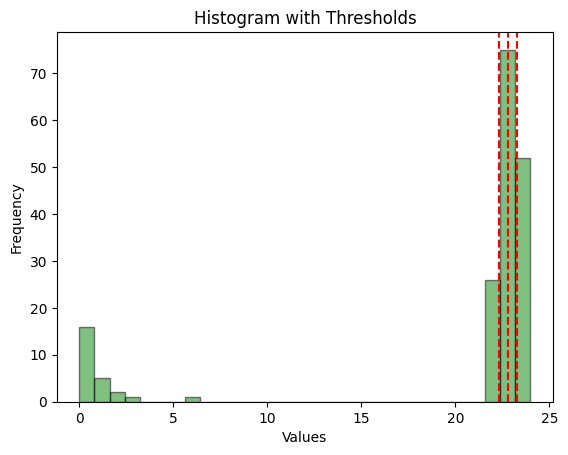

In [20]:
plot_feature_threshold(df, "SLEEP START")

[0.17 0.2  0.22]


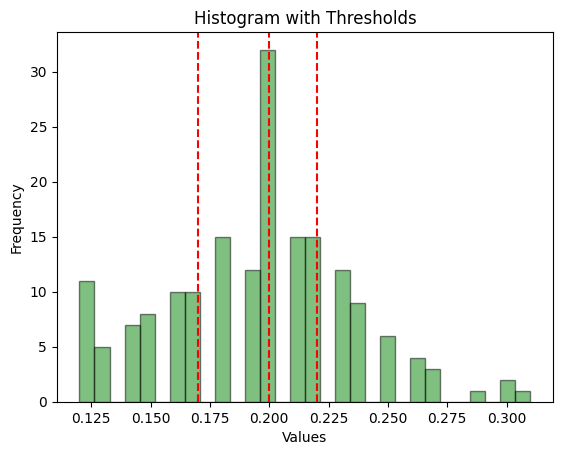

In [21]:
plot_feature_threshold(df, "REM SLEEP")

[0.17 0.2  0.22]


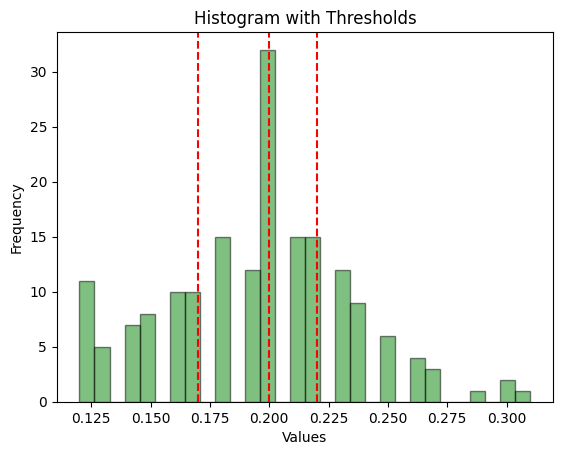

In [22]:
plot_feature_threshold(df, "REM SLEEP")

[0.15 0.17 0.19]


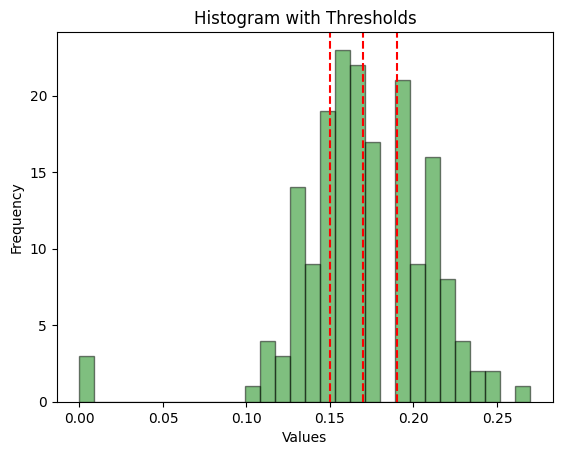

In [23]:
plot_feature_threshold(df, "DEEP SLEEP")

[7.10416667 7.53333333 8.06666667]


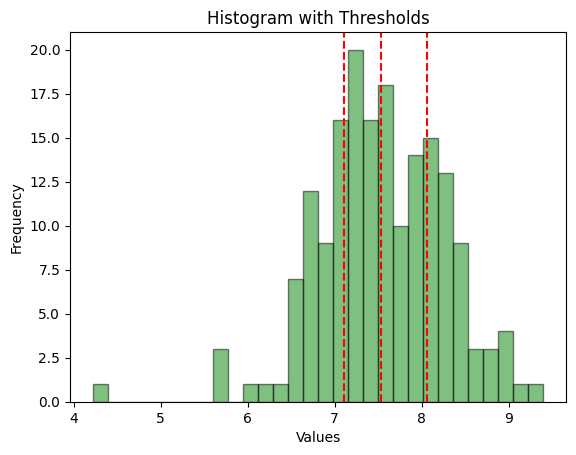

In [24]:
plot_feature_threshold(df, "HOURS OF SLEEP")

[82. 85. 87.]


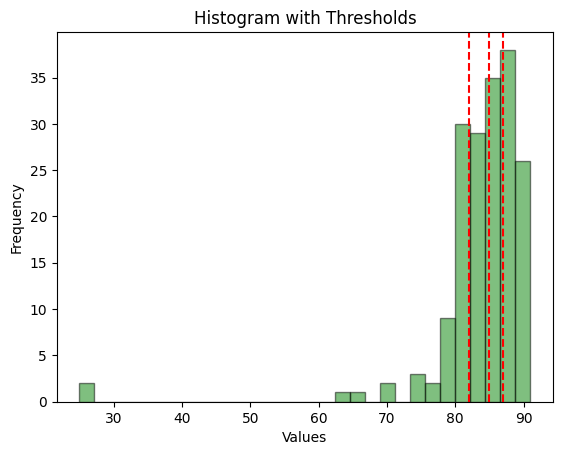

In [25]:
plot_feature_threshold(df, "SLEEP SCORE")

Now, based on the mapped thresholds pattenrs from histograms, extract some feature flags for a bad/good sleep.

OBS: Theses thresholds pattenrs could be replaced to consider the known patterns from old people. For example: 
- The ideal proportion of REM sleep for seniors (old people) is between 15% - 20%. Therefore, a proportion < 15% may indicate a "BAD REM SLEEP"
- The ideal proportion of DEEP sleep for seniors (old people) is between 10% - 22%. Therefore, a proportion < 10% may indicate a "BAD DEEP SLEEP"
- Ideally, an old person should sleep between 21h - 22h

In [26]:
df["BAD SLEEP START"] = ((df["SLEEP START"] > 23) | ((df["SLEEP START"] > 0) & (df["SLEEP START"] < 6.5))).astype(int)

df["BAD REM SLEEP"] = (df["REM SLEEP"] < 0.175).astype(int)

df["BAD DEEP SLEEP"] = (df["DEEP SLEEP"] < 0.155).astype(int)

df["BAD HOURS OF SLEEP"] = (df["HOURS OF SLEEP"] < 7.15).astype(int)

df['GOOD SLEEP SCORE'] = (df['SLEEP SCORE'] >= 80).astype(int)

df['BAD SLEEP SCORE'] = (df['SLEEP SCORE'] < 60).astype(int)

A simple heuristic to determine a bad night based on patterns found on different histograms - that were mapped as feature flags.
In the paper, nights from healthy patients are classified as good nights (`df["BAD NIGHT"]  == 0`) and nights from insomnia people are classified as bad nights (`df["BAD NIGHT"]  == 1`).

In [27]:
df["BAD NIGHT"] = (( df["BAD SLEEP START"] + df['BAD SLEEP SCORE'] + df["BAD REM SLEEP"] + df["BAD DEEP SLEEP"] + df["BAD HOURS OF SLEEP"]) >= 3).astype(int)

df['BAD NIGHT LAST DAY 1'] = df["BAD NIGHT"].shift(1)
df['BAD NIGHT LAST DAY 2'] = df["BAD NIGHT"].shift(2)
df['BAD NIGHT LAST DAY 3'] = df["BAD NIGHT"].shift(3)
df['BAD NIGHT LAST DAY 4'] = df["BAD NIGHT"].shift(4)
df['BAD NIGHT LAST DAY 5'] = df["BAD NIGHT"].shift(5)
df['BAD NIGHT LAST DAY 6'] = df["BAD NIGHT"].shift(6)

A simple heuristic to determine if the person had insomnia considering the frequency of bad nights in the last seven days.
Considering the paper, a cute insomnia has a ideal threhold of 2 or 3 bad nights.

In [28]:
# df["FREQUENCY OF BAD NIGHTS"] = df["BAD NIGHT"].rolling(window=7).sum()
df["FREQUENCY OF BAD NIGHTS"] = (
    df["BAD NIGHT"] +
    df['BAD NIGHT LAST DAY 1'] +
    df['BAD NIGHT LAST DAY 2'] +
    df['BAD NIGHT LAST DAY 3'] +
    df['BAD NIGHT LAST DAY 4'] + 
    df['BAD NIGHT LAST DAY 5'] + 
    df['BAD NIGHT LAST DAY 6']
)

df["FREQUENCY OF GOOD NIGHTS"] = 7 - df["FREQUENCY OF BAD NIGHTS"]

df["INSOMNIA"] = (df["FREQUENCY OF BAD NIGHTS"] >= 2).astype(int)

In [29]:
df = df.dropna()

# ID

In [30]:
# criando identificacao em codigo hash para pacientes fake
df['PATIENT ID'] = df.apply(md5_row, axis=1)

# Feature Selection

In [31]:
feature_cols = [
    "PATIENT ID",

    "DATE MONTH",
    "DATE DAY",
    "DATE WEEK DAY",

    "SLEEP START",
    "SLEEP START LAST DAY 1",
    "SLEEP START LAST DAY 2",
    "SLEEP START LAST DAY 3",
    "SLEEP START LAST DAY 4",
    "SLEEP START LAST DAY 5",
    "SLEEP START LAST DAY 6",

    "SLEEP END",
    "SLEEP END LAST DAY 1",
    "SLEEP END LAST DAY 2",
    "SLEEP END LAST DAY 3",
    "SLEEP END LAST DAY 4",
    "SLEEP END LAST DAY 5",
    "SLEEP END LAST DAY 6",

    "HOURS OF SLEEP",
    "HOURS OF SLEEP LAST DAY 1",
    "HOURS OF SLEEP LAST DAY 2",
    "HOURS OF SLEEP LAST DAY 3",
    "HOURS OF SLEEP LAST DAY 4",
    "HOURS OF SLEEP LAST DAY 5",
    "HOURS OF SLEEP LAST DAY 6",

    "REM SLEEP",
    "REM SLEEP LAST DAY 1",
    "REM SLEEP LAST DAY 2",
    "REM SLEEP LAST DAY 3",
    "REM SLEEP LAST DAY 4",
    "REM SLEEP LAST DAY 5",
    "REM SLEEP LAST DAY 6",

    "DEEP SLEEP",
    "DEEP SLEEP LAST DAY 1",
    "DEEP SLEEP LAST DAY 2",
    "DEEP SLEEP LAST DAY 3",
    "DEEP SLEEP LAST DAY 4",
    "DEEP SLEEP LAST DAY 5",
    "DEEP SLEEP LAST DAY 6",

    "HEART RATE BELOW RESTING",
    "HEART RATE BELOW RESTING LAST DAY 1",
    "HEART RATE BELOW RESTING LAST DAY 2",
    "HEART RATE BELOW RESTING LAST DAY 3",
    "HEART RATE BELOW RESTING LAST DAY 4",
    "HEART RATE BELOW RESTING LAST DAY 5",
    "HEART RATE BELOW RESTING LAST DAY 6",

    'BAD NIGHT',
    'BAD NIGHT LAST DAY 1',
    'BAD NIGHT LAST DAY 2',
    'BAD NIGHT LAST DAY 3',
    'BAD NIGHT LAST DAY 4',
    'BAD NIGHT LAST DAY 5',
    'BAD NIGHT LAST DAY 6',

    "FREQUENCY OF BAD NIGHTS",
    "FREQUENCY OF GOOD NIGHTS",

    "INSOMNIA",
]

In [32]:
df = df[feature_cols]

In [33]:
df.head()

,PATIENT ID,DATE MONTH,DATE DAY,DATE WEEK DAY,SLEEP START,SLEEP START LAST DAY 1,SLEEP START LAST DAY 2,SLEEP START LAST DAY 3,SLEEP START LAST DAY 4,SLEEP START LAST DAY 5,SLEEP START LAST DAY 6,SLEEP END,SLEEP END LAST DAY 1,SLEEP END LAST DAY 2,SLEEP END LAST DAY 3,SLEEP END LAST DAY 4,SLEEP END LAST DAY 5,SLEEP END LAST DAY 6,HOURS OF SLEEP,HOURS OF SLEEP LAST DAY 1,HOURS OF SLEEP LAST DAY 2,HOURS OF SLEEP LAST DAY 3,HOURS OF SLEEP LAST DAY 4,HOURS OF SLEEP LAST DAY 5,HOURS OF SLEEP LAST DAY 6,REM SLEEP,REM SLEEP LAST DAY 1,REM SLEEP LAST DAY 2,REM SLEEP LAST DAY 3,REM SLEEP LAST DAY 4,REM SLEEP LAST DAY 5,REM SLEEP LAST DAY 6,DEEP SLEEP,DEEP SLEEP LAST DAY 1,DEEP SLEEP LAST DAY 2,DEEP SLEEP LAST DAY 3,DEEP SLEEP LAST DAY 4,DEEP SLEEP LAST DAY 5,DEEP SLEEP LAST DAY 6,HEART RATE BELOW RESTING,HEART RATE BELOW RESTING LAST DAY 1,HEART RATE BELOW RESTING LAST DAY 2,HEART RATE BELOW RESTING LAST DAY 3,HEART RATE BELOW RESTING LAST DAY 4,HEART RATE BELOW RESTING LAST DAY 5,HEART RATE BELOW RESTING LAST DAY 6,BAD NIGHT,BAD NIGHT LAST DAY 1,BAD NIGHT LAST DAY 2,BAD NIGHT LAST DAY 3,BAD NIGHT LAST DAY 4,BAD NIGHT LAST DAY 5,BAD NIGHT LAST DAY 6,FREQUENCY OF BAD NIGHTS,FREQUENCY OF GOOD NIGHTS,INSOMNIA
70,b5581b1a132020fd07f64854c8fbe3df,1,7,4,22.166667,23.983333,22.700000,22.866667,23.450000,2.850000,6.166667,5.966667,7.883333,6.950000,7.316667,8.466667,11.983333,10.866667,6.800000,6.766667,7.166667,7.416667,7.450000,8.150000,4.216667,0.19,0.14,0.18,0.19,0.16,0.22,0.15,0.21,0.16,0.15,0.21,0.13,0.18,0.18,0.96,0.96,0.89,0.99,0.96,0.92,0.00,0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,1
71,1989843011c12217ba5ef04914877212,1,8,5,23.066667,22.166667,23.983333,22.700000,22.866667,23.450000,2.850000,8.083333,5.966667,7.883333,6.950000,7.316667,8.466667,11.983333,7.616667,6.800000,6.766667,7.166667,7.416667,7.450000,8.150000,0.12,0.19,0.14,0.18,0.19,0.16,0.22,0.17,0.21,0.16,0.15,0.21,0.13,0.18,0.98,0.96,0.96,0.89,0.99,0.96,0.92,0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,5.0,1
72,83b7e7305157d7b4a3be1885d0f8bdb3,1,9,6,23.216667,23.066667,22.166667,23.983333,22.700000,22.866667,23.450000,8.100000,8.083333,5.966667,7.883333,6.950000,7.316667,8.466667,7.783333,7.616667,6.800000,6.766667,7.166667,7.416667,7.450000,0.20,0.12,0.19,0.14,0.18,0.19,0.16,0.12,0.17,0.21,0.16,0.15,0.21,0.13,0.98,0.98,0.96,0.96,0.89,0.99,0.96,0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,5.0,1
73,1ae209b6f15b012c97fbb6e4af42d4e2,1,10,0,22.616667,23.216667,23.066667,22.166667,23.983333,22.700000,22.866667,7.150000,8.100000,8.083333,5.966667,7.883333,6.950000,7.316667,7.433333,7.783333,7.616667,6.800000,6.766667,7.166667,7.416667,0.23,0.20,0.12,0.19,0.14,0.18,0.19,0.18,0.12,0.17,0.21,0.16,0.15,0.21,0.96,0.98,0.98,0.96,0.96,0.89,0.99,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,0
74,ea2ab5f4a4e6873b4227a2ca3f942b25,1,11,1,23.483333,22.616667,23.216667,23.066667,22.166667,23.983333,22.700000,7.216667,7.150000,8.100000,8.083333,5.966667,7.883333,6.950000,6.983333,7.433333,7.783333,7.616667,6.800000,6.766667,7.166667,0.31,0.23,0.20,0.12,0.19,0.14,0.18,0.24,0.18,0.12,0.17,0.21,0.16,0.15,0.71,0.96,0.98,0.98,0.96,0.96,0.89,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,0


# Exploratory Data Analysis

In [34]:
df["BAD NIGHT"].value_counts()

BAD NIGHT
0    145
1     27
Name: count, dtype: int64

In [35]:
df["INSOMNIA"].value_counts()

INSOMNIA
0    107
1     65
Name: count, dtype: int64

In [36]:
df.head()

,PATIENT ID,DATE MONTH,DATE DAY,DATE WEEK DAY,SLEEP START,SLEEP START LAST DAY 1,SLEEP START LAST DAY 2,SLEEP START LAST DAY 3,SLEEP START LAST DAY 4,SLEEP START LAST DAY 5,SLEEP START LAST DAY 6,SLEEP END,SLEEP END LAST DAY 1,SLEEP END LAST DAY 2,SLEEP END LAST DAY 3,SLEEP END LAST DAY 4,SLEEP END LAST DAY 5,SLEEP END LAST DAY 6,HOURS OF SLEEP,HOURS OF SLEEP LAST DAY 1,HOURS OF SLEEP LAST DAY 2,HOURS OF SLEEP LAST DAY 3,HOURS OF SLEEP LAST DAY 4,HOURS OF SLEEP LAST DAY 5,HOURS OF SLEEP LAST DAY 6,REM SLEEP,REM SLEEP LAST DAY 1,REM SLEEP LAST DAY 2,REM SLEEP LAST DAY 3,REM SLEEP LAST DAY 4,REM SLEEP LAST DAY 5,REM SLEEP LAST DAY 6,DEEP SLEEP,DEEP SLEEP LAST DAY 1,DEEP SLEEP LAST DAY 2,DEEP SLEEP LAST DAY 3,DEEP SLEEP LAST DAY 4,DEEP SLEEP LAST DAY 5,DEEP SLEEP LAST DAY 6,HEART RATE BELOW RESTING,HEART RATE BELOW RESTING LAST DAY 1,HEART RATE BELOW RESTING LAST DAY 2,HEART RATE BELOW RESTING LAST DAY 3,HEART RATE BELOW RESTING LAST DAY 4,HEART RATE BELOW RESTING LAST DAY 5,HEART RATE BELOW RESTING LAST DAY 6,BAD NIGHT,BAD NIGHT LAST DAY 1,BAD NIGHT LAST DAY 2,BAD NIGHT LAST DAY 3,BAD NIGHT LAST DAY 4,BAD NIGHT LAST DAY 5,BAD NIGHT LAST DAY 6,FREQUENCY OF BAD NIGHTS,FREQUENCY OF GOOD NIGHTS,INSOMNIA
70,b5581b1a132020fd07f64854c8fbe3df,1,7,4,22.166667,23.983333,22.700000,22.866667,23.450000,2.850000,6.166667,5.966667,7.883333,6.950000,7.316667,8.466667,11.983333,10.866667,6.800000,6.766667,7.166667,7.416667,7.450000,8.150000,4.216667,0.19,0.14,0.18,0.19,0.16,0.22,0.15,0.21,0.16,0.15,0.21,0.13,0.18,0.18,0.96,0.96,0.89,0.99,0.96,0.92,0.00,0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,1
71,1989843011c12217ba5ef04914877212,1,8,5,23.066667,22.166667,23.983333,22.700000,22.866667,23.450000,2.850000,8.083333,5.966667,7.883333,6.950000,7.316667,8.466667,11.983333,7.616667,6.800000,6.766667,7.166667,7.416667,7.450000,8.150000,0.12,0.19,0.14,0.18,0.19,0.16,0.22,0.17,0.21,0.16,0.15,0.21,0.13,0.18,0.98,0.96,0.96,0.89,0.99,0.96,0.92,0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,5.0,1
72,83b7e7305157d7b4a3be1885d0f8bdb3,1,9,6,23.216667,23.066667,22.166667,23.983333,22.700000,22.866667,23.450000,8.100000,8.083333,5.966667,7.883333,6.950000,7.316667,8.466667,7.783333,7.616667,6.800000,6.766667,7.166667,7.416667,7.450000,0.20,0.12,0.19,0.14,0.18,0.19,0.16,0.12,0.17,0.21,0.16,0.15,0.21,0.13,0.98,0.98,0.96,0.96,0.89,0.99,0.96,0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,5.0,1
73,1ae209b6f15b012c97fbb6e4af42d4e2,1,10,0,22.616667,23.216667,23.066667,22.166667,23.983333,22.700000,22.866667,7.150000,8.100000,8.083333,5.966667,7.883333,6.950000,7.316667,7.433333,7.783333,7.616667,6.800000,6.766667,7.166667,7.416667,0.23,0.20,0.12,0.19,0.14,0.18,0.19,0.18,0.12,0.17,0.21,0.16,0.15,0.21,0.96,0.98,0.98,0.96,0.96,0.89,0.99,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,0
74,ea2ab5f4a4e6873b4227a2ca3f942b25,1,11,1,23.483333,22.616667,23.216667,23.066667,22.166667,23.983333,22.700000,7.216667,7.150000,8.100000,8.083333,5.966667,7.883333,6.950000,6.983333,7.433333,7.783333,7.616667,6.800000,6.766667,7.166667,0.31,0.23,0.20,0.12,0.19,0.14,0.18,0.24,0.18,0.12,0.17,0.21,0.16,0.15,0.71,0.96,0.98,0.98,0.96,0.96,0.89,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,0


# Export Data

In [37]:
df.to_parquet("../data/cleaned/insomnia_healthy_patients.parquet")